# Kalman-Style Smoothing for Normalization

Final Project for Seminar Geometry and Topology in Deep Learning

* Name: Zixuan Xia
* Student Number:  24-109-662

## Google Colab Setup
Before getting started we need to run some boilerplate code to set up our environment. You'll need to rerun this setup code each time you start the notebook.

First, run this cell load the autoreload extension. This allows us to edit .py source files, and re-import them into the notebook for a seamless editing and debugging experience.


Then, we need to run a few commands to set up our environment on Google Colab. If you are running this notebook on a local machine you can skip this section.
Run the following cell to mount your Google Drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Recall the path in your Google Drive where you uploaded this notebook, fill it in below. If everything is working correctly then running the folowing cell should print the filenames from the project:

In [5]:
import os

# TODO: Fill in the Google Drive path where you uploaded the project
# Example: If you create a 2020FA folder and put all the files under A1 folder, then '2020FA/A1'
# GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = '2020FA/A1'
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Seminar_Topology'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['final_project.ipynb', 'training_log_cifar100_gkn.csv', 'training_log_cifar10_gn.csv', 'training_log_cifar10_gkn.csv', 'training_log_cifar100_gn.csv']


In the very last step of the environment setup procedure, we need to go into the current directory by using the following command to go into the current folder, you can change the folder name and the path if you want.

In [6]:
# get into current path
%cd /content/drive/MyDrive/Seminar_Topology/

/content/drive/MyDrive/Seminar_Topology


In [7]:
!ls

final_project.ipynb	       training_log_cifar10_gkn.csv
training_log_cifar100_gkn.csv  training_log_cifar10_gn.csv
training_log_cifar100_gn.csv


## Part 1: Group Normalzation for CIFAR10/100

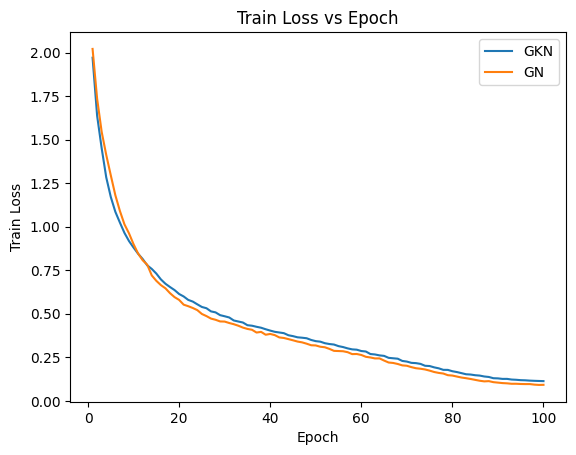

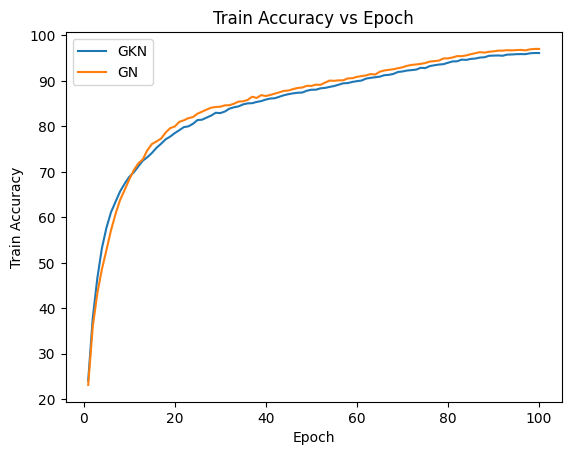

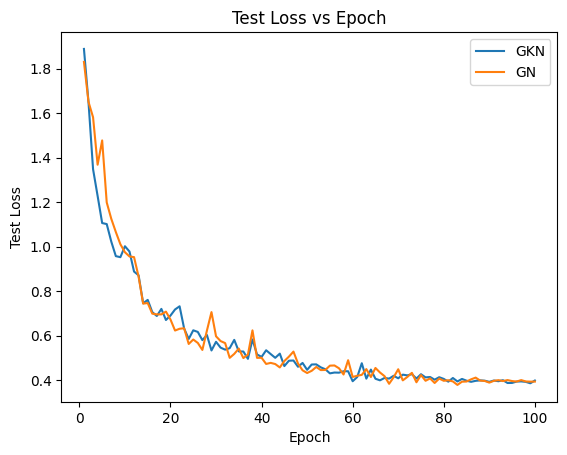

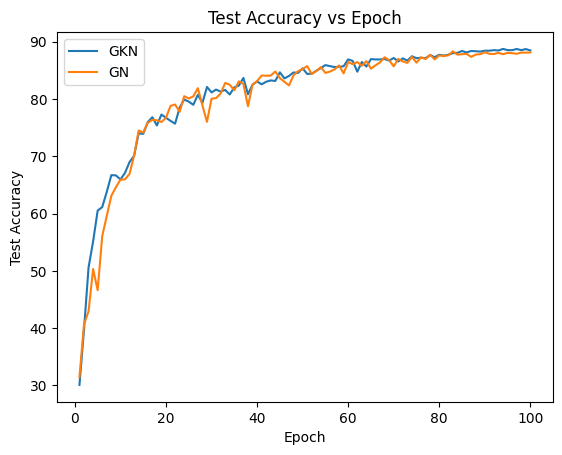

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load training logs
gkn_path = "training_log_cifar10_gkn.csv"
gn_path = "training_log_cifar10_gn.csv"

gkn = pd.read_csv(gkn_path)
gn = pd.read_csv(gn_path)

# ---- Train Loss ----
plt.figure()
plt.plot(gkn["epoch"], gkn["train_loss"], label="GKN")
plt.plot(gn["epoch"], gn["train_loss"], label="GN")
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.title("Train Loss vs Epoch")
plt.legend()
plt.show()

# ---- Train Accuracy ----
plt.figure()
plt.plot(gkn["epoch"], gkn["train_acc"], label="GKN")
plt.plot(gn["epoch"], gn["train_acc"], label="GN")
plt.xlabel("Epoch")
plt.ylabel("Train Accuracy")
plt.title("Train Accuracy vs Epoch")
plt.legend()
plt.show()

# ---- Test Loss ----
plt.figure()
plt.plot(gkn["epoch"], gkn["test_loss"], label="GKN")
plt.plot(gn["epoch"], gn["test_loss"], label="GN")
plt.xlabel("Epoch")
plt.ylabel("Test Loss")
plt.title("Test Loss vs Epoch")
plt.legend()
plt.show()

# ---- Test Accuracy ----
plt.figure()
plt.plot(gkn["epoch"], gkn["test_acc"], label="GKN")
plt.plot(gn["epoch"], gn["test_acc"], label="GN")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs Epoch")
plt.legend()
plt.show()


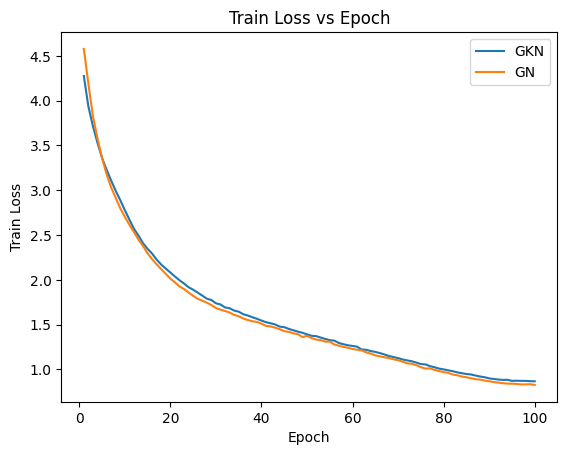

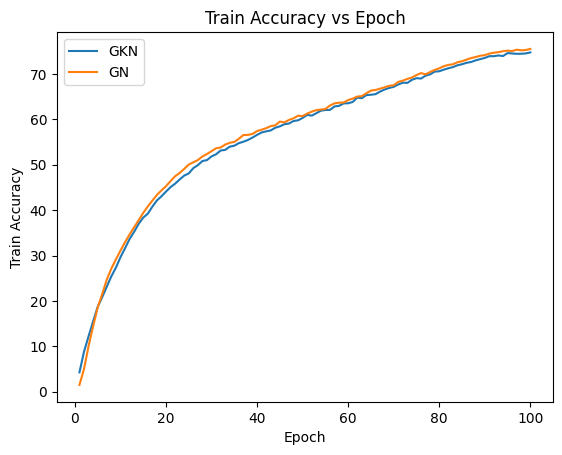

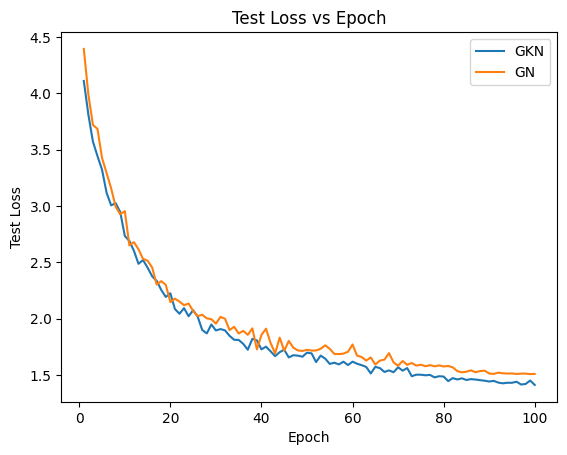

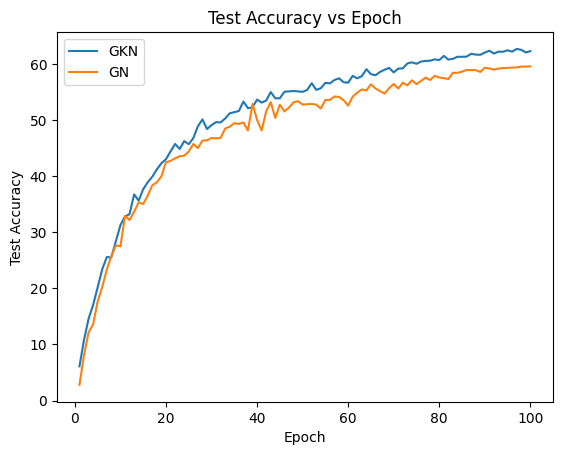

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load training logs
gkn_path = "training_log_cifar100_gkn.csv"
gn_path = "training_log_cifar100_gn.csv"

gkn = pd.read_csv(gkn_path)
gn = pd.read_csv(gn_path)

# ---- Train Loss ----
plt.figure()
plt.plot(gkn["epoch"], gkn["train_loss"], label="GKN")
plt.plot(gn["epoch"], gn["train_loss"], label="GN")
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.title("Train Loss vs Epoch")
plt.legend()
plt.show()

# ---- Train Accuracy ----
plt.figure()
plt.plot(gkn["epoch"], gkn["train_acc"], label="GKN")
plt.plot(gn["epoch"], gn["train_acc"], label="GN")
plt.xlabel("Epoch")
plt.ylabel("Train Accuracy")
plt.title("Train Accuracy vs Epoch")
plt.legend()
plt.show()

# ---- Test Loss ----
plt.figure()
plt.plot(gkn["epoch"], gkn["test_loss"], label="GKN")
plt.plot(gn["epoch"], gn["test_loss"], label="GN")
plt.xlabel("Epoch")
plt.ylabel("Test Loss")
plt.title("Test Loss vs Epoch")
plt.legend()
plt.show()

# ---- Test Accuracy ----
plt.figure()
plt.plot(gkn["epoch"], gkn["test_acc"], label="GKN")
plt.plot(gn["epoch"], gn["test_acc"], label="GN")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs Epoch")
plt.legend()
plt.show()


### Geometric Visualization

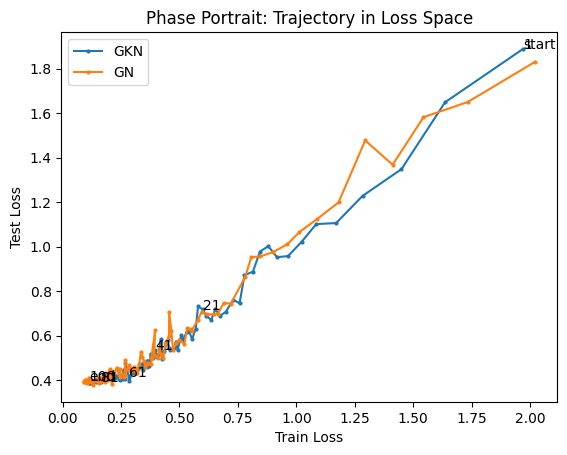

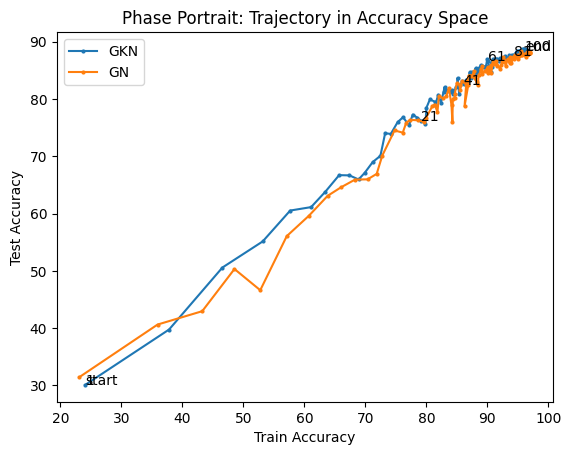

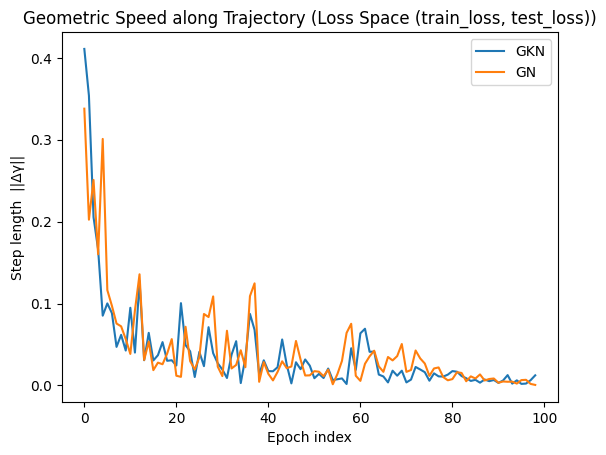

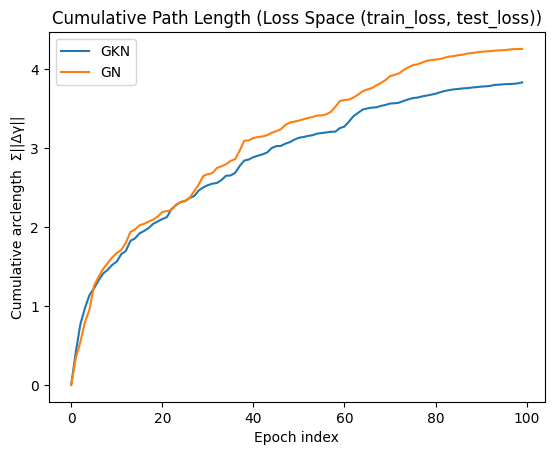

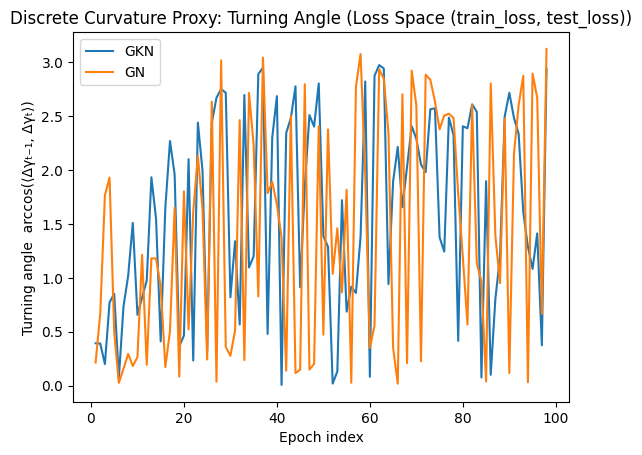

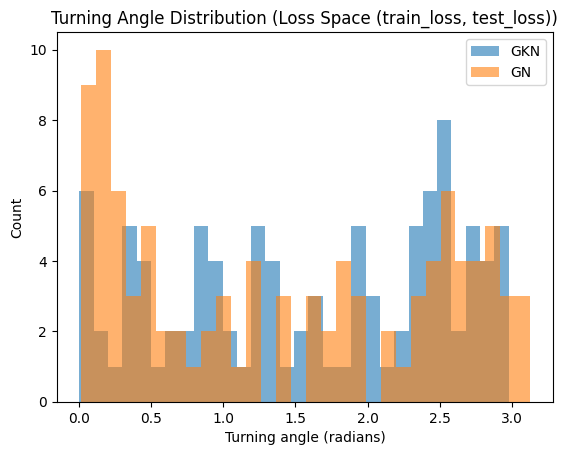

[GKN | Loss Space (train_loss, test_loss)]
  Total arclength: 3.830022
  Mean step length: 0.038687  (std 0.060225)
  Mean turning angle: 1.603353 rad  (std 0.919808)
  95th percentile turning angle: 2.878670 rad

[GN | Loss Space (train_loss, test_loss)]
  Total arclength: 4.253816
  Mean step length: 0.042968  (std 0.058128)
  Mean turning angle: 1.426955 rad  (std 1.059747)
  95th percentile turning angle: 2.926319 rad



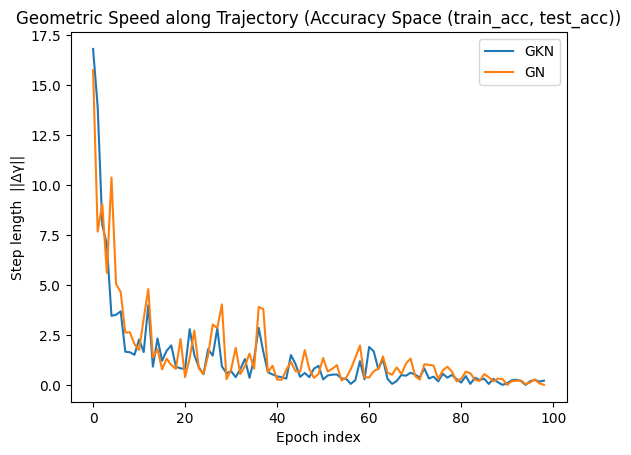

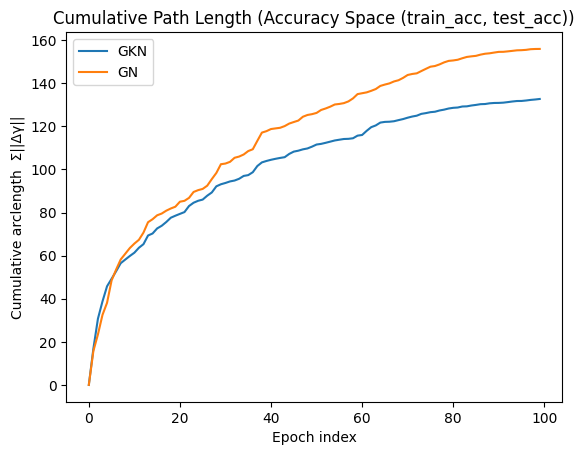

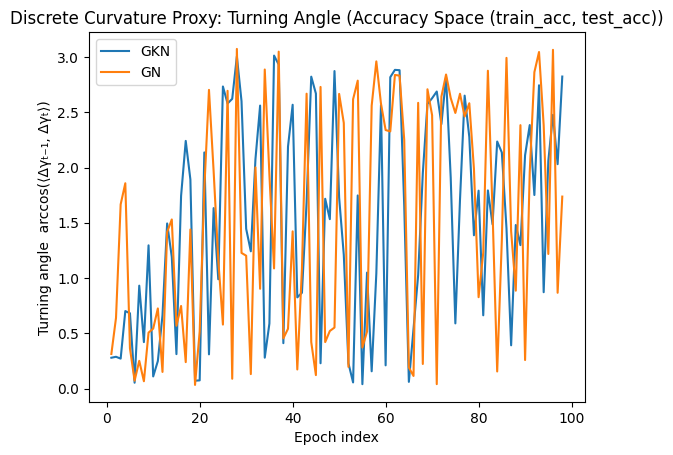

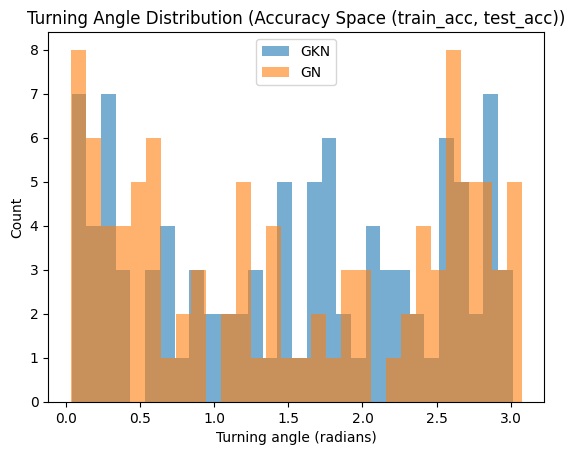

[GKN | Accuracy Space (train_acc, test_acc)]
  Total arclength: 132.699968
  Mean step length: 1.340404  (std 2.390309)
  Mean turning angle: 1.525862 rad  (std 0.941880)
  95th percentile turning angle: 2.874279 rad

[GN | Accuracy Space (train_acc, test_acc)]
  Total arclength: 155.929425
  Mean step length: 1.575045  (std 2.296217)
  Mean turning angle: 1.502445 rad  (std 1.035368)
  95th percentile turning angle: 2.965435 rad



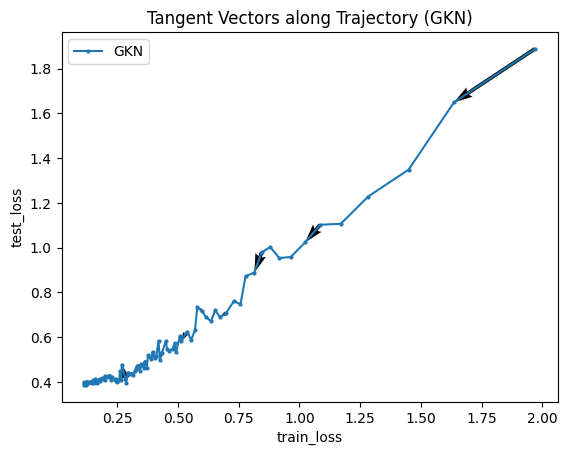

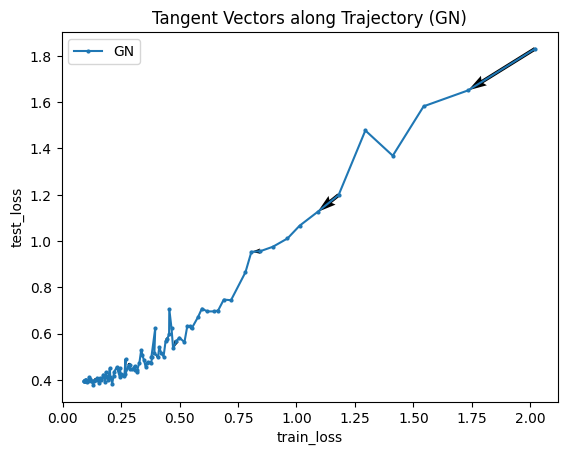

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# Config
# ----------------------------
GKN_PATH = "training_log_cifar10_gkn.csv"
GN_PATH  = "training_log_cifar10_gn.csv"

# ----------------------------
# Helpers: discrete geometry on a 2D curve gamma(t)
# ----------------------------
def discrete_speed(points: np.ndarray) -> np.ndarray:
    """
    points: (T, 2)
    returns speed per step: ||p_{t+1} - p_t||, shape (T-1,)
    """
    d = np.diff(points, axis=0)
    return np.linalg.norm(d, axis=1)

def discrete_turning_angle(points: np.ndarray, eps: float = 1e-12) -> np.ndarray:
    """
    Discrete turning angle at each internal vertex:
      angle_t = arccos( <d_{t-1}, d_t> / (||d_{t-1}|| ||d_t||) )
    where d_t = p_{t+1} - p_t
    returns angles for t = 1..T-2, shape (T-2,)
    """
    d = np.diff(points, axis=0)  # (T-1, 2)
    d_prev = d[:-1]
    d_next = d[1:]
    n_prev = np.linalg.norm(d_prev, axis=1)
    n_next = np.linalg.norm(d_next, axis=1)
    denom = (n_prev * n_next) + eps

    cosang = np.sum(d_prev * d_next, axis=1) / denom
    cosang = np.clip(cosang, -1.0, 1.0)
    return np.arccos(cosang)  # radians

def cumulative_arclength(points: np.ndarray) -> np.ndarray:
    """
    returns cumulative arclength S(t) with S(0)=0, shape (T,)
    """
    sp = discrete_speed(points)
    S = np.zeros(points.shape[0], dtype=float)
    S[1:] = np.cumsum(sp)
    return S

def make_points(df: pd.DataFrame, xcol: str, ycol: str) -> np.ndarray:
    return df[[xcol, ycol]].to_numpy(dtype=float)

def annotate_start_end(points: np.ndarray):
    plt.annotate("start", (points[0, 0], points[0, 1]))
    plt.annotate("end", (points[-1, 0], points[-1, 1]))

def annotate_some_epochs(df: pd.DataFrame, points: np.ndarray, every: int = 20):
    # annotate a few epoch indices to show direction in time
    if "epoch" not in df.columns:
        return
    idxs = list(range(0, len(df), every))
    if idxs[-1] != len(df) - 1:
        idxs.append(len(df) - 1)
    for i in idxs:
        e = int(df.loc[i, "epoch"])
        plt.annotate(str(e), (points[i, 0], points[i, 1]))

# ----------------------------
# Load data
# ----------------------------
gkn = pd.read_csv(GKN_PATH)
gn  = pd.read_csv(GN_PATH)

# basic sanity: ensure sorted by epoch if present
if "epoch" in gkn.columns:
    gkn = gkn.sort_values("epoch").reset_index(drop=True)
if "epoch" in gn.columns:
    gn = gn.sort_values("epoch").reset_index(drop=True)

# ----------------------------
# 1) Phase portraits (geometric trajectories)
# ----------------------------
def plot_phase_portrait(df_a, df_b, label_a, label_b, xcol, ycol, title, xlabel, ylabel):
    pts_a = make_points(df_a, xcol, ycol)
    pts_b = make_points(df_b, xcol, ycol)

    plt.figure()
    plt.plot(pts_a[:, 0], pts_a[:, 1], marker="o", markersize=2, label=label_a)
    plt.plot(pts_b[:, 0], pts_b[:, 1], marker="o", markersize=2, label=label_b)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()

    annotate_start_end(pts_a)
    annotate_some_epochs(df_a, pts_a, every=max(1, len(df_a)//5))

    plt.show()

plot_phase_portrait(
    gkn, gn, "GKN", "GN",
    xcol="train_loss", ycol="test_loss",
    title="Phase Portrait: Trajectory in Loss Space",
    xlabel="Train Loss", ylabel="Test Loss"
)

plot_phase_portrait(
    gkn, gn, "GKN", "GN",
    xcol="train_acc", ycol="test_acc",
    title="Phase Portrait: Trajectory in Accuracy Space",
    xlabel="Train Accuracy", ylabel="Test Accuracy"
)

# ----------------------------
# 2) Speed / Arclength / Curvature (turning angle)
# ----------------------------
def plot_geometry_signals(df_a, df_b, label_a, label_b, xcol, ycol, domain_name):
    pts_a = make_points(df_a, xcol, ycol)
    pts_b = make_points(df_b, xcol, ycol)

    # speed and cumulative arclength
    sp_a = discrete_speed(pts_a)
    sp_b = discrete_speed(pts_b)
    S_a  = cumulative_arclength(pts_a)
    S_b  = cumulative_arclength(pts_b)

    # turning angle (curvature proxy)
    ang_a = discrete_turning_angle(pts_a)
    ang_b = discrete_turning_angle(pts_b)

    # x-axis as epoch index (not necessarily the 'epoch' value)
    t_a = np.arange(len(pts_a))
    t_b = np.arange(len(pts_b))

    # Speed per step: defined for t=0..T-2
    plt.figure()
    plt.plot(t_a[:-1], sp_a, label=f"{label_a}")
    plt.plot(t_b[:-1], sp_b, label=f"{label_b}")
    plt.xlabel("Epoch index")
    plt.ylabel("Step length  ||Δγ||")
    plt.title(f"Geometric Speed along Trajectory ({domain_name})")
    plt.legend()
    plt.show()

    # Cumulative arclength: defined for t=0..T-1
    plt.figure()
    plt.plot(t_a, S_a, label=f"{label_a}")
    plt.plot(t_b, S_b, label=f"{label_b}")
    plt.xlabel("Epoch index")
    plt.ylabel("Cumulative arclength  Σ||Δγ||")
    plt.title(f"Cumulative Path Length ({domain_name})")
    plt.legend()
    plt.show()

    # Turning angle: defined for t=1..T-2
    plt.figure()
    plt.plot(t_a[1:-1], ang_a, label=f"{label_a}")
    plt.plot(t_b[1:-1], ang_b, label=f"{label_b}")
    plt.xlabel("Epoch index")
    plt.ylabel("Turning angle  arccos(⟨Δγₜ₋₁, Δγₜ⟩)")
    plt.title(f"Discrete Curvature Proxy: Turning Angle ({domain_name})")
    plt.legend()
    plt.show()

    # Angle distribution (hist): more geometric “roughness” comparison
    plt.figure()
    plt.hist(ang_a, bins=30, alpha=0.6, label=label_a)
    plt.hist(ang_b, bins=30, alpha=0.6, label=label_b)
    plt.xlabel("Turning angle (radians)")
    plt.ylabel("Count")
    plt.title(f"Turning Angle Distribution ({domain_name})")
    plt.legend()
    plt.show()

    # Print a few scalar summaries (useful for report)
    def summarize(name, sp, S, ang):
        print(f"[{name} | {domain_name}]")
        print(f"  Total arclength: {S[-1]:.6f}")
        print(f"  Mean step length: {sp.mean():.6f}  (std {sp.std():.6f})")
        print(f"  Mean turning angle: {ang.mean():.6f} rad  (std {ang.std():.6f})")
        print(f"  95th percentile turning angle: {np.percentile(ang, 95):.6f} rad")
        print()

    summarize(label_a, sp_a, S_a, ang_a)
    summarize(label_b, sp_b, S_b, ang_b)

plot_geometry_signals(
    gkn, gn, "GKN", "GN",
    xcol="train_loss", ycol="test_loss",
    domain_name="Loss Space (train_loss, test_loss)"
)

plot_geometry_signals(
    gkn, gn, "GKN", "GN",
    xcol="train_acc", ycol="test_acc",
    domain_name="Accuracy Space (train_acc, test_acc)"
)

# ----------------------------
# 3) Optional: "direction field" style arrows (local tangent vectors)
#    (still purely geometric; no color specification)
# ----------------------------
def plot_tangent_arrows(df, label, xcol, ycol, stride=5):
    pts = make_points(df, xcol, ycol)
    d = np.diff(pts, axis=0)
    # subsample for readability
    idx = np.arange(0, len(d), stride)
    base = pts[idx]
    vec = d[idx]

    plt.figure()
    plt.plot(pts[:, 0], pts[:, 1], marker="o", markersize=2, label=label)
    plt.quiver(base[:, 0], base[:, 1], vec[:, 0], vec[:, 1],
               angles="xy", scale_units="xy", scale=1)
    plt.xlabel(xcol)
    plt.ylabel(ycol)
    plt.title(f"Tangent Vectors along Trajectory ({label})")
    plt.legend()
    plt.show()

plot_tangent_arrows(gkn, "GKN", "train_loss", "test_loss", stride=max(1, len(gkn)//20))
plot_tangent_arrows(gn,  "GN",  "train_loss", "test_loss", stride=max(1, len(gn)//20))
